# Question 1

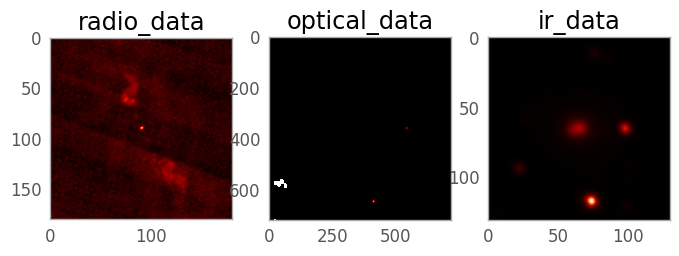

<Figure size 800x600 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import numpy as np
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

plt.style.use(astropy_mpl_style)

radio_file = get_pkg_data_filename('/home/mehul/RadioKSP/Week1/VV 382 NED 01/radiofreqvv382ned01.fits')
optical_file = get_pkg_data_filename('/home/mehul/RadioKSP/Week1/VV 382 NED 01/PanSTARRS__J011259.60+152929.0_rings.v3.skycell.1594.080.stk.g.unconv_s1.5arcmin_g.fits')
ir_file = get_pkg_data_filename('/home/mehul/RadioKSP/Week1/VV 382 NED 01/WISE__J011259.60+152929.0_0187p151_ac51-w1-int-3_s1.5arcmin_w1.fits')

hdu_list = fits.open(radio_file)
hdu_list_optical = fits.open(optical_file)
hdu_list_ir = fits.open(ir_file)

radio_data = hdu_list[0].data
radio_data = np.squeeze(radio_data)

optical_data = hdu_list_optical[0].data
optical_data = np.squeeze(optical_data)

ir_data = hdu_list_ir[0].data
ir_data = np.squeeze(ir_data)

f, axarr = plt.subplots(1,3)


axarr[0].imshow(radio_data)
axarr[0].set_title('radio_data')
axarr[0].grid(False)


axarr[1].imshow(optical_data)
axarr[1].set_title('optical_data')
axarr[1].grid(False)


axarr[2].imshow(ir_data)
axarr[2].set_title('ir_data')
axarr[2].grid(False)


plt.show()
plt.savefig("plot1.jpg")




In Radio Wavelengths, we can clearly see the radio source, along with the jets emitted by it. Whereas, it is invisible in the optical wavelengths, with slight visibility in the infrared region. Jet lobes are invisible in the infrared region, but we can locate a bright infrared source which can be seen even in the optical image, but with no visibility in radio wavelengths.


# QUESTION 3


[18.7  15.1  14.5  22.5  25.6  34.   44.   48.   61.   70.   96.2  97.3
 75.9  60.5  64.7  43.2  40.3  34.8  36.3  31.2  14.8   4.9   2.86]


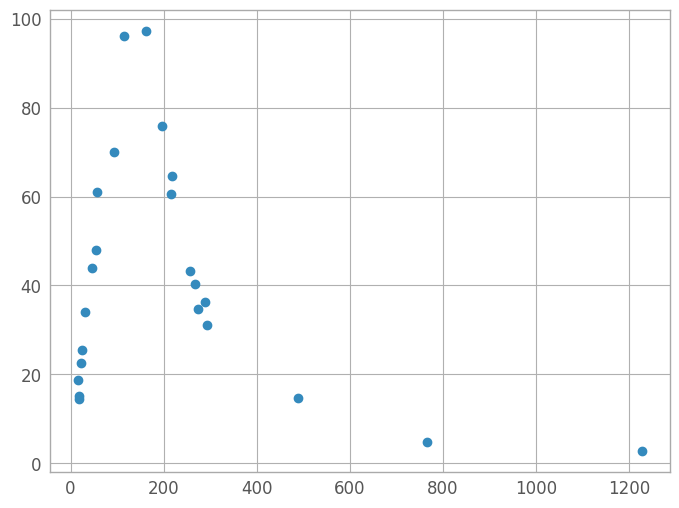

In [3]:
from astropy.io import ascii
gw170817 = ascii.read('http://www.tauceti.caltech.edu/kunal/gw170817/gw170817_afterglow_data_full.txt')

gw170817 = gw170817.group_by('Telescope')

mask = gw170817.groups.keys['Telescope'] == 'VLA'

gw170817_vla = gw170817.groups[mask]

gw170817_vla = gw170817_vla.group_by('Freq')

mask = gw170817_vla.groups.keys['Freq'] == 3*(10**9)

gw170817_final = gw170817_vla.groups[mask]

plot_T = np.array(gw170817_final['T'])
plot_FluxD = np.array(gw170817_final['FluxD'])
plot_FluxD = np.delete(plot_FluxD,[0,1])
plot_T = np.delete(plot_T,[0,1])
plot_FluxD = plot_FluxD.astype(float)


print(plot_FluxD)

plt.scatter(plot_T, plot_FluxD)




[18.7  15.1  14.5  22.5  25.6  34.   44.   48.   61.   70.   96.2  97.3
 75.9  60.5  64.7  43.2  40.3  34.8  36.3  31.2  14.8   4.9   2.86]


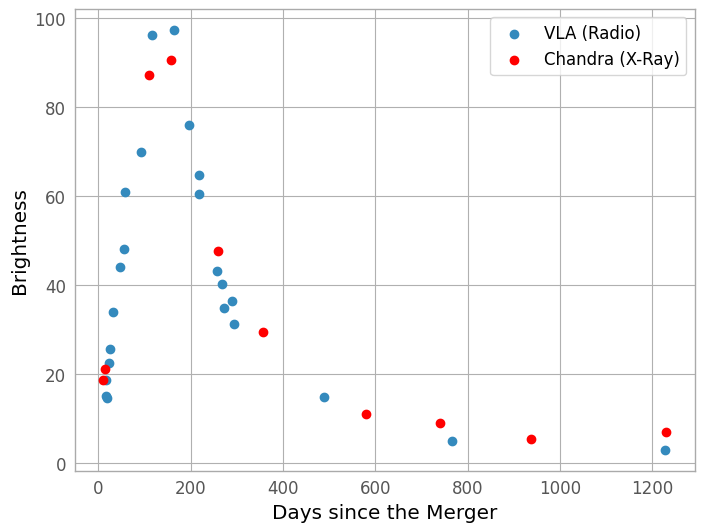

In [4]:
mask = gw170817.groups.keys['Telescope'] == 'Chandra'
gw170817_chandra = gw170817.groups[mask]
gw170817_chandra = gw170817_chandra.group_by('Freq')

mask = gw170817_chandra.groups.keys['Freq'] == 2.41*(10**17)

gw170817_chandra_final = gw170817_chandra.groups[mask]

plot_chandra_T = np.array(gw170817_chandra_final['T'])
plot_chandra_FluxD = np.array(gw170817_chandra_final['FluxD'])
plot_chandra_FluxD = np.delete(plot_chandra_FluxD,[0])
plot_chandra_T = np.delete(plot_chandra_T,[0])
plot_chandra_FluxD = plot_chandra_FluxD.astype(float)

plot_chandra_FluxD = plot_chandra_FluxD*(((3/2.41)*10**(-8))**(-0.584))

print(plot_FluxD)
plt.scatter(plot_T, plot_FluxD,label="VLA (Radio)")
plt.scatter(plot_chandra_T, plot_chandra_FluxD, color="red",label="Chandra (X-Ray)")
plt.legend()
plt.xlabel('Days since the Merger')
plt.ylabel('Brightness')
plt.savefig("ChandraPlot.png")
